In [1]:
from fonctions_image import *
import cv2

# Variables
url = "http://10.220.14.33:8080/video"
puzzle_image_path = "../nos_puzzles/yakari.jpg"
puzzle_chateau_path = "../nos_puzzles/chateau.jpg"
verbose = True

### Sift

In [2]:
# Chargement
#cap = start_camera(url)
sift, bf, target_image, keypoints_full, descriptors_full = load_image_sift_knn(puzzle_image_path)
sift_chateau, bf_chateau, target_image_chateau, keypoints_full_chateau, descriptors_full_chateau = load_image_sift_knn(puzzle_chateau_path)

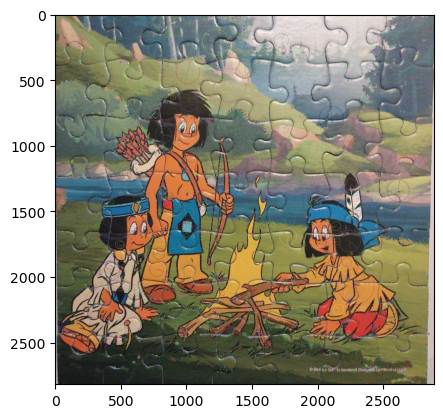

In [3]:
img_with_keypoints = cv2.drawKeypoints(target_image, keypoints_full, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
yakari_with_keypoints = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)
plt.imshow(yakari_with_keypoints)

In [4]:
#frame = read_frame(cap)
frame = cv2.imread("test_2.jpg")
print(frame.shape)

(4080, 3072, 3)


True

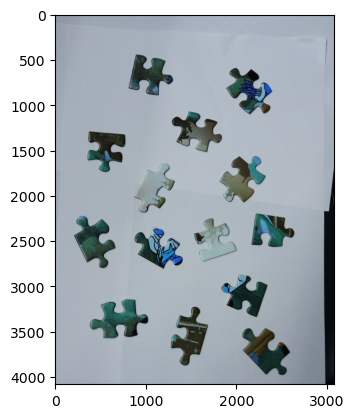

In [5]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
cv2.imwrite("test_2.jpg", frame)

# Piece Extraction Pipeline

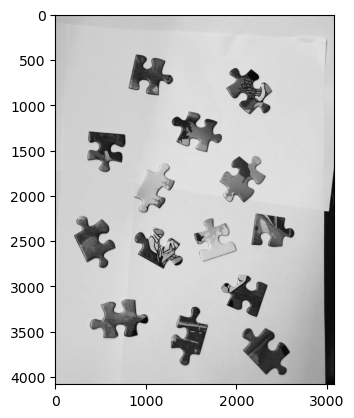

In [6]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

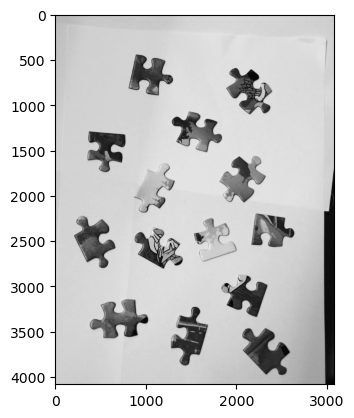

In [7]:
# Important to get rid of noise 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')

## Thresholds (test, pas utilisé)

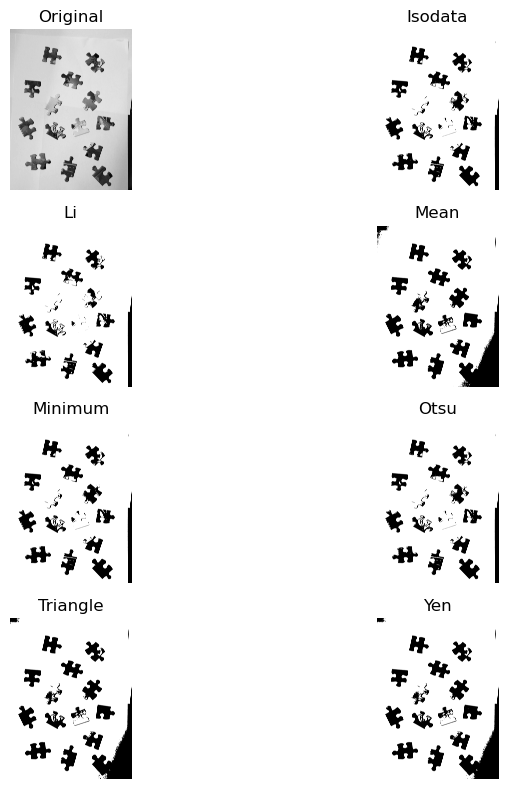

In [8]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(blurred, figsize=(10, 8), verbose=False)
plt.show()

## Edge detection

### Adaptive threshold

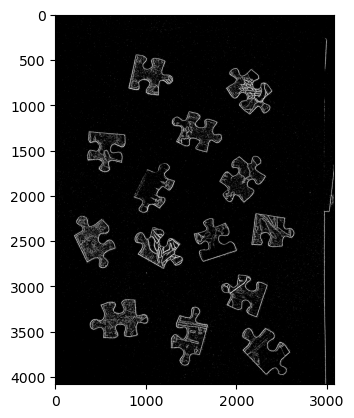

In [ ]:
# Adaptive threshold used more like edge detection here
binary = cv2.adaptiveThreshold(
            blurred,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV,
            blockSize=11,  # Must be odd number
            C=2  # Constant subtracted from mean
        )
plt.imshow(binary, cmap='gray')

### Canny (problème : définir les thresholds)

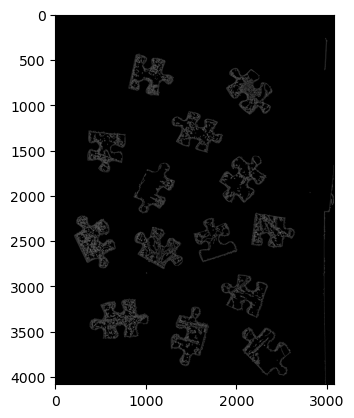

In [32]:
edges = cv2.Canny(blurred, threshold1=10, threshold2=40)
plt.imshow(edges, cmap='gray')

### Sobel : dérivées

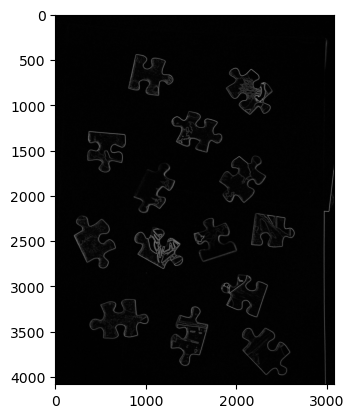

In [36]:
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # X gradient
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Y gradient
sobel_edges = cv2.magnitude(sobelx, sobely)  # Combine gradients
plt.imshow(sobel_edges, cmap='gray')

### Operations qui permettent de mieux mettre en avant les contours

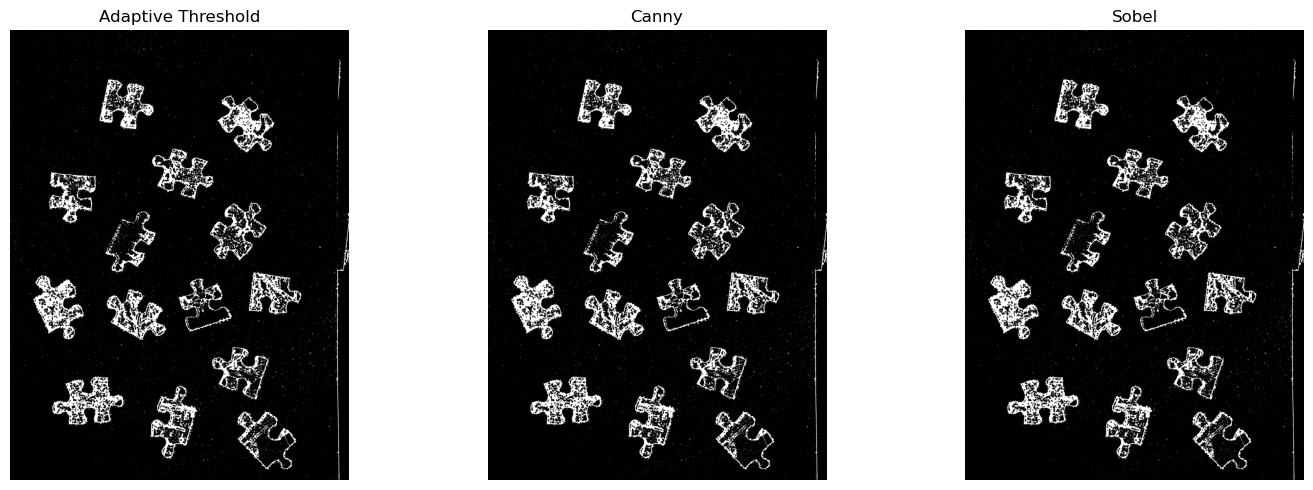

In [39]:
# Morphological operations with smaller kernel
kernel_small = np.ones((3, 3), np.uint8)
kernel_medium = np.ones((8, 8), np.uint8)
#kernel_large = np.ones((15, 15), np.uint8)

# Close small holes first
#morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_large)
morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_medium)
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel_small)

morph_canny = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_medium)
morph_canny = cv2.morphologyEx(morph_canny, cv2.MORPH_CLOSE, kernel_small)

morph_sobel = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_medium)
morph_sobel = cv2.morphologyEx(morph_sobel, cv2.MORPH_CLOSE, kernel_small)

images = [morph, morph_canny, morph_sobel]
titles = ['Adaptive Threshold', 'Canny', 'Sobel']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

for ax, img, title in zip(axs, images, titles):
    ax.imshow(img, cmap='gray')  # Display image
    ax.set_title(title)          # Set title
    ax.axis('off')               # Hide axes

plt.tight_layout()  # Adjust layout
plt.show()

### Contours remplis

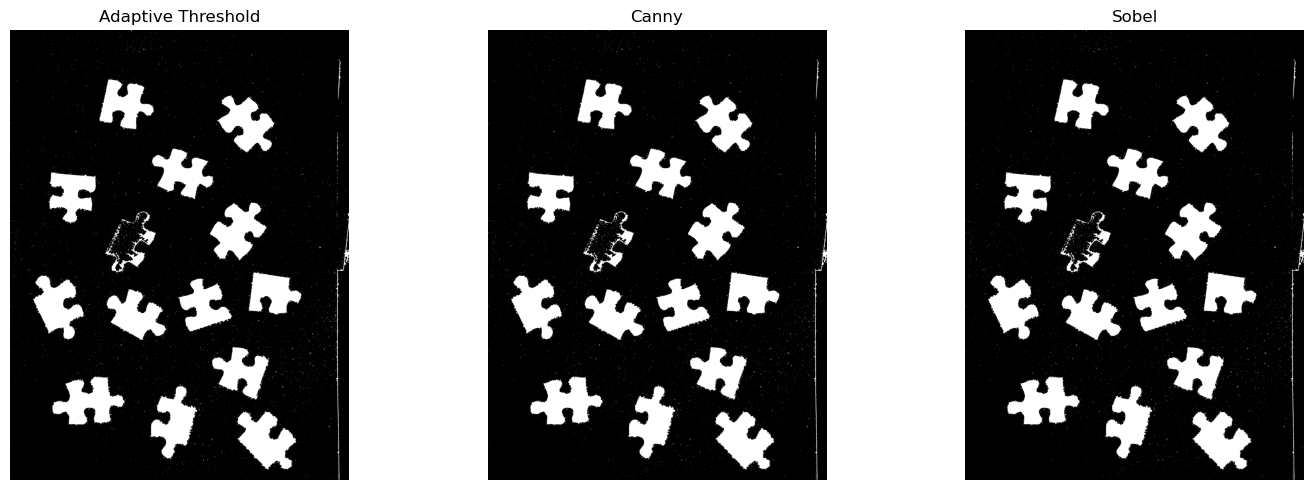

In [38]:
filled_images = []

# Process contours for each image
for img in images:
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(img)  # Create a blank mask
    
    # Fill each contour
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, 255, -1)
    
    filled_images.append(mask)  # Append the filled image to the list

# Plot results side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

for ax, img, title in zip(axs, filled_images, titles):
    ax.imshow(img, cmap='gray')  # Display image
    ax.set_title(title)          # Set title
    ax.axis('off')               # Hide axes

plt.tight_layout()  # Adjust layout
plt.show()

In [12]:
pieces = extract_pieces(frame)

Found 13 valid pieces
Piece areas: [119512, 137930, 127266, 115497, 143428, 114037, 143106, 118271, 130815, 122657, 154168, 138430, 158075]



Piece 0:
Position: (787, 421)
Size: (540, 500)
Area: 119512

Piece 1:
Position: (1857, 571)
Size: (558, 564)
Area: 137930

Piece 2:
Position: (1268, 1052)
Size: (601, 506)
Area: 127266

Piece 3:
Position: (331, 1269)
Size: (474, 505)
Area: 115497

Piece 4:
Position: (1792, 1542)
Size: (555, 566)
Area: 143428

Piece 5:
Position: (2144, 2169)
Size: (520, 434)
Area: 114037

Piece 6:
Position: (185, 2201)
Size: (508, 631)
Area: 143106

Piece 7:
Position: (1504, 2229)
Size: (531, 527)
Area: 118271

Piece 8:
Position: (849, 2331)
Size: (587, 501)
Area: 130815

Piece 9:
Position: (1805, 2854)
Size: (563, 520)
Area: 122657

Piece 10:
Position: (358, 3121)
Size: (700, 489)
Area: 154168

Piece 11:
Position: (1249, 3193)
Size: (470, 721)
Area: 138430

Piece 12:
Position: (2033, 3437)
Size: (582, 571)
Area: 158075


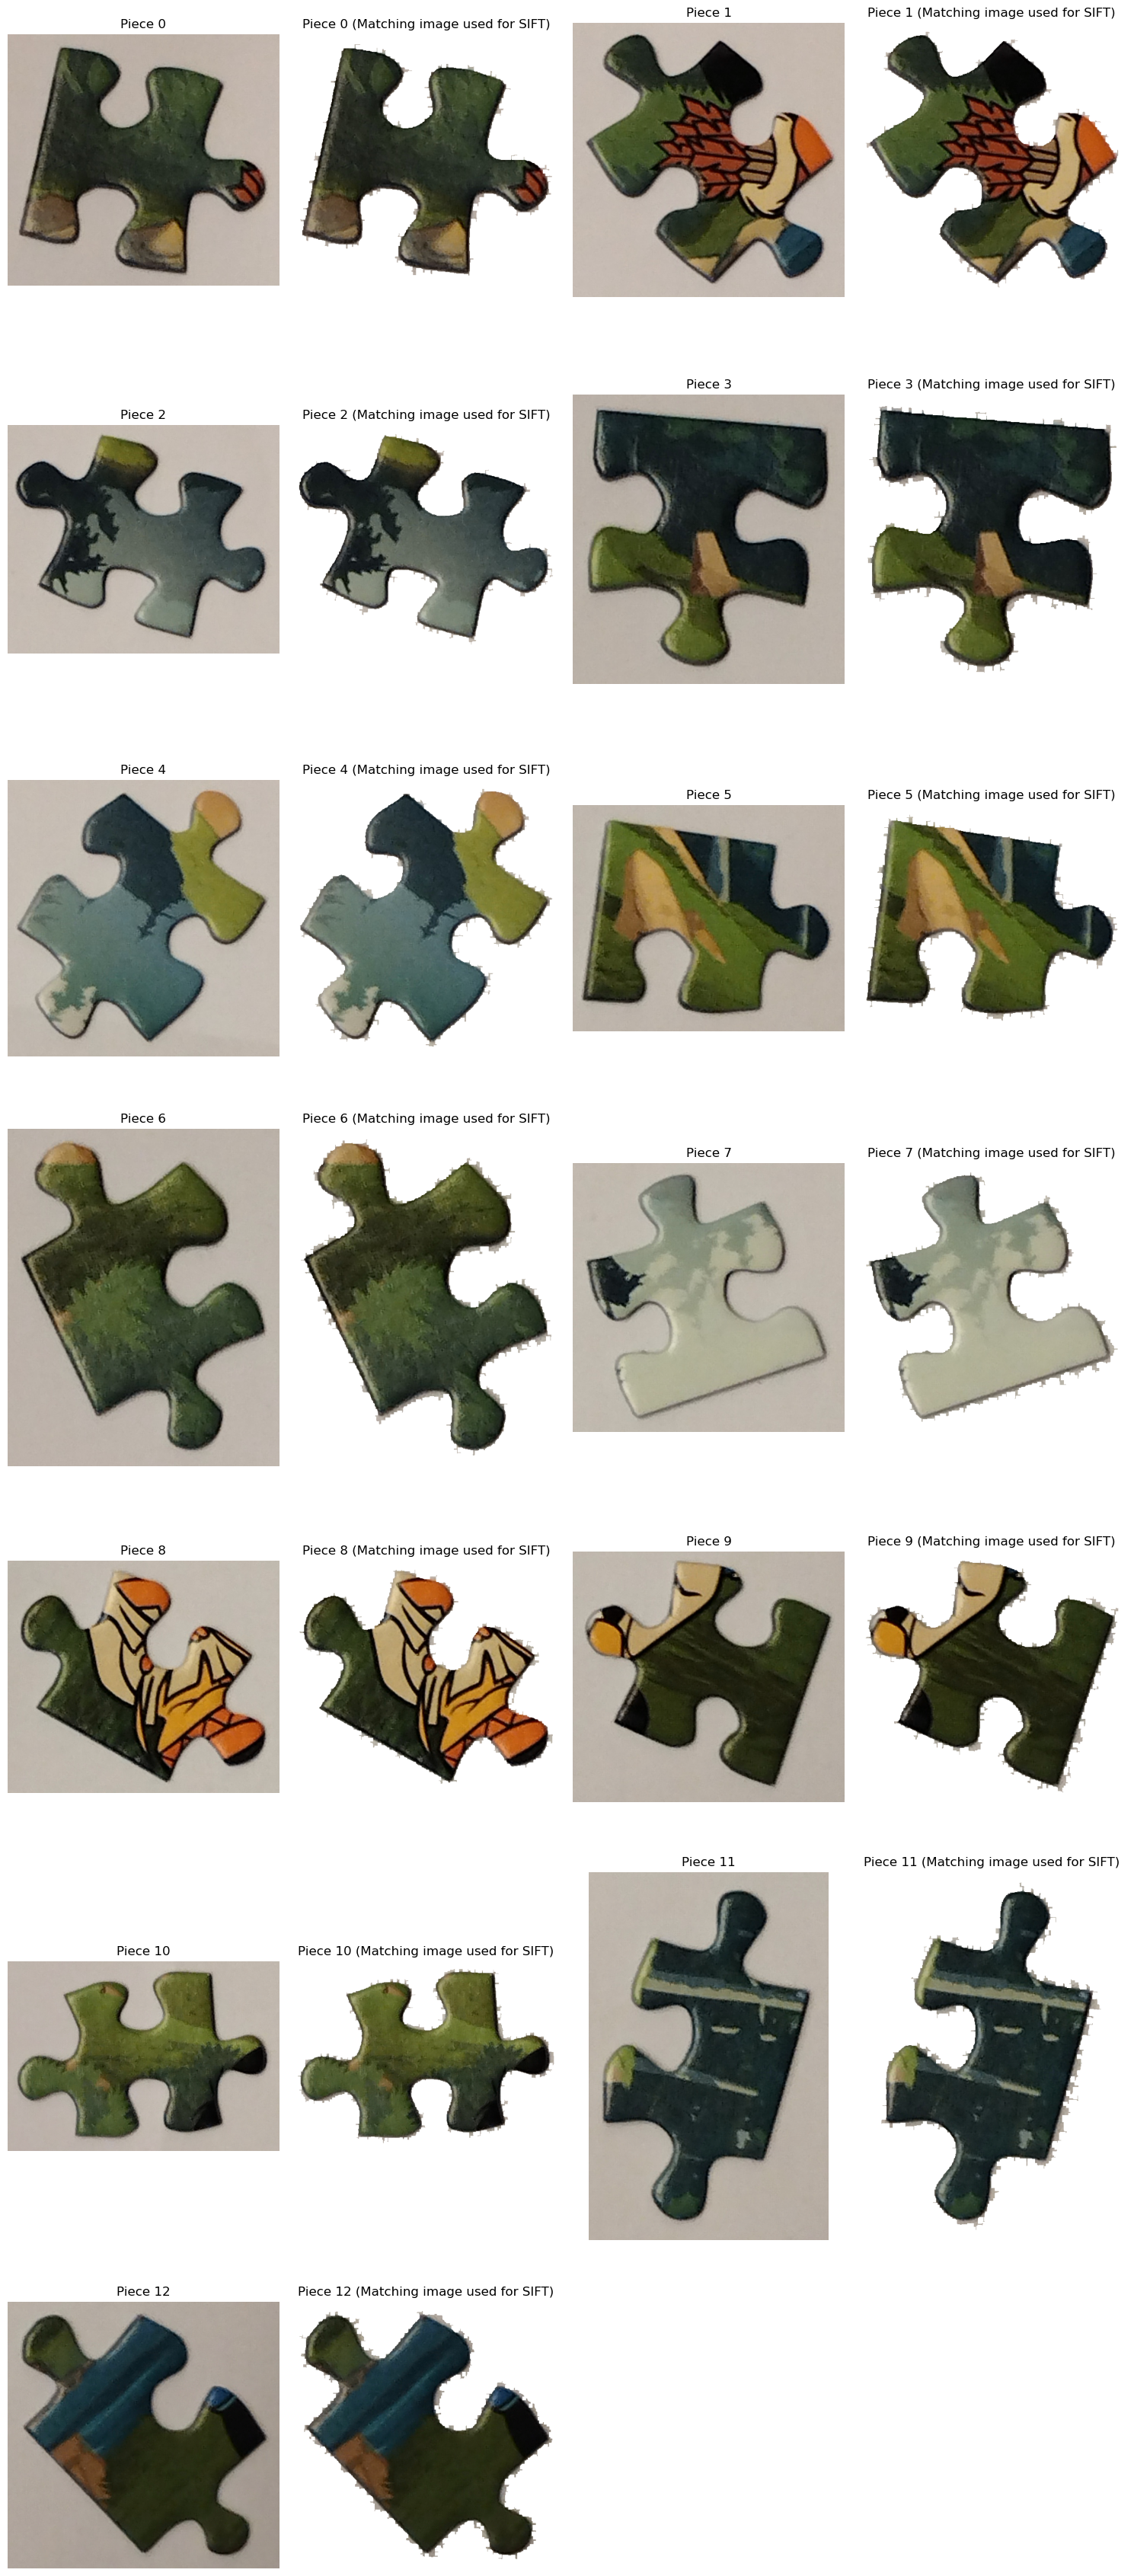

In [13]:
show_found_pieces(pieces)

## Piece analysis

### Baseline piece with high quality

Found 3 valid pieces
Piece areas: [117607, 586427, 302289]


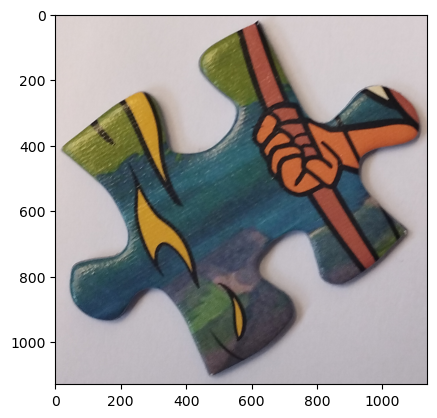

In [14]:
baseline = cv2.imread("yakari_bras.jpg")
baseline = cv2.cvtColor(baseline, cv2.COLOR_BGR2RGB)

baseline_pieces = extract_pieces(baseline)

baseline_piece = baseline_pieces[1]
plt.imshow(baseline_piece["image"])

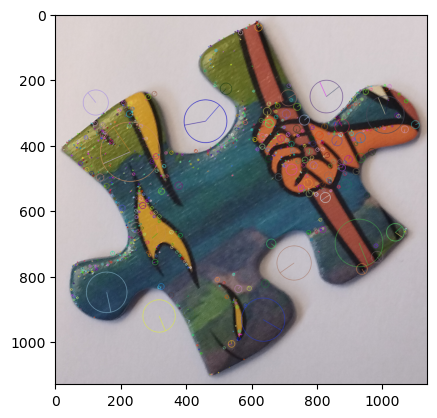

In [15]:
baseline_keypoints, baseline_descriptors = sift.detectAndCompute(baseline_piece['image'], None)
baseline_piece_keypoints = cv2.drawKeypoints(baseline_piece['image'], baseline_keypoints, baseline_piece['image'], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(baseline_piece_keypoints)

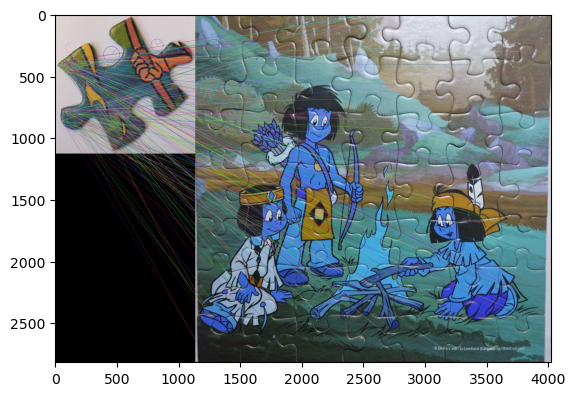

In [16]:
baseline_matches = bf.knnMatch(baseline_descriptors, descriptors_full, k=2)
baseline_match_img = cv2.drawMatchesKnn(baseline_piece['image'], baseline_keypoints, target_image, keypoints_full, baseline_matches[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(baseline_match_img)

### With lowe's ratio test

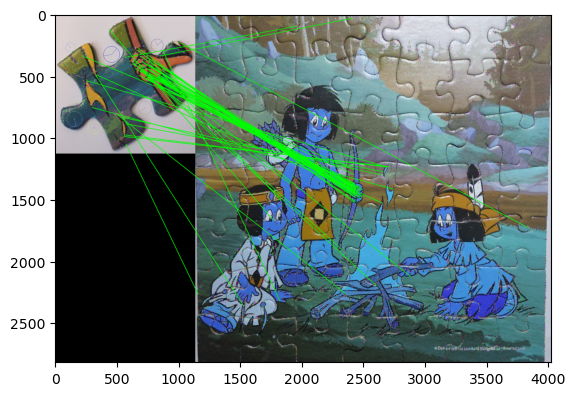

In [17]:
good_matches = []
for m, n in baseline_matches:
    if m.distance < 0.75 * n.distance:  # Lowe's ratio test
        good_matches.append(m)

# Then draw with OpenCV's function
matched_img = cv2.drawMatches(baseline_piece['image'], baseline_keypoints,
                            target_image, keypoints_full,
                            good_matches[:100], None,
                            matchColor=(0, 255, 0),
                            matchesThickness=3)
plt.imshow(matched_img)

### With mask

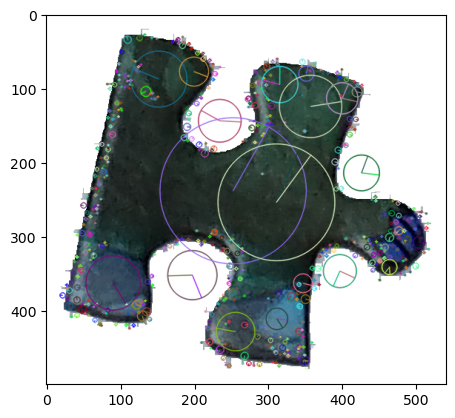

In [18]:
piece = pieces[0]
keypoints, descriptors = sift.detectAndCompute(piece['matching_image'], None)
piece_keypoints = cv2.drawKeypoints(piece['matching_image'], keypoints, piece['matching_image'], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(piece_keypoints)

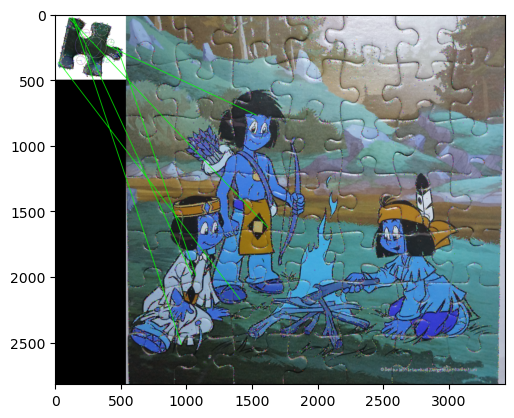

In [19]:
matches = bf.knnMatch(descriptors, descriptors_full, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Lowe's ratio test
        good_matches.append(m)
        
matched_img = cv2.drawMatches(piece['matching_image'], keypoints,
                            target_image, keypoints_full,
                            good_matches, None,
                            matchColor=(0, 255, 0),
                            matchesThickness=3)
plt.imshow(matched_img)

### Without mask

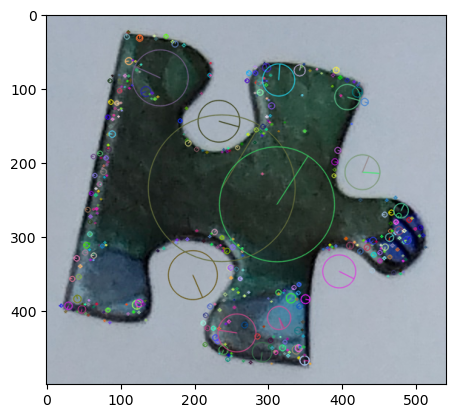

In [20]:
keypoints_nomask, descriptors_nomask = sift.detectAndCompute(piece['image'], None)
piece_keypoints_nomask = cv2.drawKeypoints(piece['image'], keypoints_nomask, piece['image'], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(piece_keypoints_nomask)

Found 462 matches


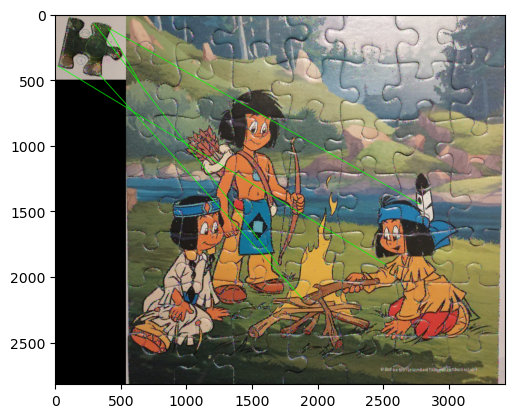

In [21]:
matches_nomask = bf.knnMatch(descriptors_nomask, descriptors_full, k=2)
print(f"Found {len(matches_nomask)} matches")

good_matches = []
for m, n in matches_nomask:
    if m.distance < 0.75 * n.distance:  # Lowe's ratio test
        good_matches.append(m)
        
matched_img = cv2.drawMatches(piece['image'], keypoints_nomask,
                            target_image, keypoints_full,
                            good_matches, None,
                            matchColor=(0, 255, 0),
                            matchesThickness=3)

match_img_nomask = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)
plt.imshow(match_img_nomask)

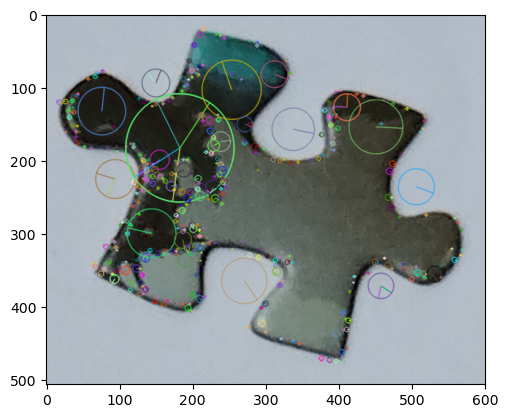

In [22]:
piece_2 = pieces[2]
keypoints_2, descriptors_2 = sift.detectAndCompute(piece_2['image'], None)
piece_keypoints_2 = cv2.drawKeypoints(piece_2['image'], keypoints_2, piece_2['image'], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(piece_keypoints_2)

Found 439 matches


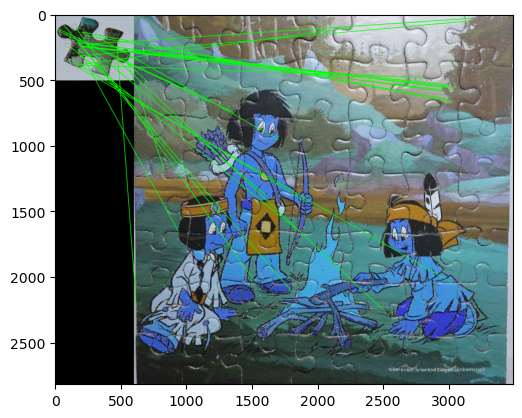

In [23]:
matches_2 = bf.knnMatch(descriptors_2, descriptors_full, k=2)
print(f"Found {len(matches_2)} matches")

good_matches_2 = []
for m, n in matches_2:
    if m.distance < 0.8 * n.distance:  # Lowe's ratio test
        good_matches_2.append(m)

matched_img_2 = cv2.drawMatches(piece_2['image'], keypoints_2,
                            target_image, keypoints_full,
                            good_matches_2, None,
                            matchColor=(0, 255, 0),
                            matchesThickness=3)

plt.imshow(matched_img_2)